# Arewa Data Science Academy
## Deep Learning Cohort2.0
**Name: Zaharaddeen Nura Ibrahim**

**Email: zaharaddeennura@gmail.com**

**Title: Week 2 Solution**


In [1]:
# Importing necessary libraries
import torch
import matplotlib.pyplot as plt

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1. Create a straight line dataset using the linear regression formula (weight * X + bias).

In [3]:
# Create data Parameters
weight = 0.3
bias = 0.9


# Make X and y using linear regression formula
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
num_points = len(X)

# Split the data into training and testing
train_split = int(0.8 * num_points)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

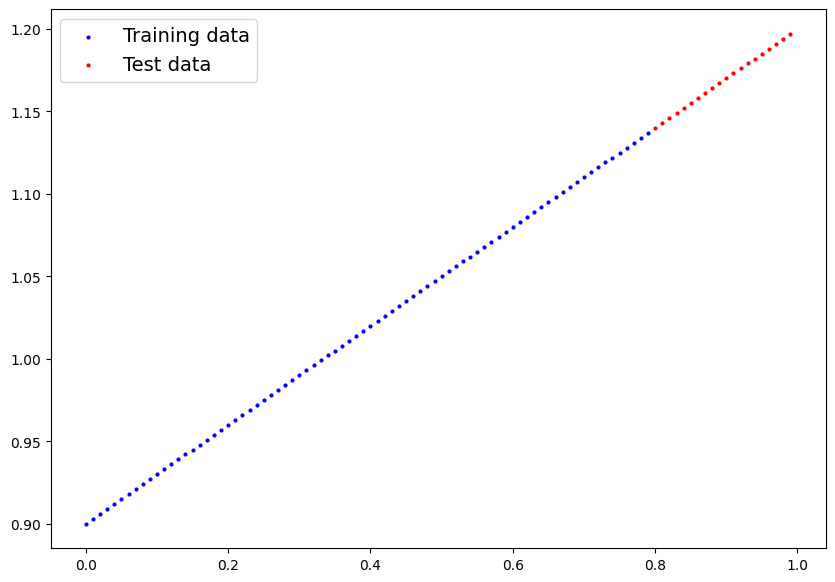

In [5]:
# Plot the training and testing data
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'r',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 14})
plot_predictions()

### 2. Build a PyTorch model by subclassing nn.Module

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module

import torch.nn as nn
class LinearRegressionModel(nn.Module):  # Inherit from nn.Module
    def __init__(self):
        super().__init__()  # Initialize the parent class

        # Manually define weights and bias as trainable parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))  # Random weight
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))  # Random bias

    def forward(self, x):
        return self.weight * x + self.bias  # Linear regression equation: y = w * X + b


In [8]:
# Create an instance of the model
torch.manual_seed(42)
lr_model = LinearRegressionModel()


In [9]:
# Displaying the parameters
lr_model,lr_model.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [10]:
next(lr_model.parameters()).device

device(type='cpu')

In [11]:
# Instantiate the model and put it to the target device
lr_model.to(device)
list(lr_model.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [12]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss() # Criterion to measure the mean absolute error (MAE)
optimizer = torch.optim.SGD(params = lr_model.parameters(), lr = 0.01)

In [13]:
# Training loop
# Train model for 300 epochs
torch.manual_seed(42)

epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  lr_model.train()

  # 1. Forward pass
  y_pred = lr_model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
    lr_model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = lr_model(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


### 4. Make predictions with the trained model on the test data.

In [14]:
# Make predictions with the model
lr_model.eval()

with torch.inference_mode():
  y_preds = lr_model(X_test)
y_preds


tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

In [15]:
y_preds.cpu()

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]])

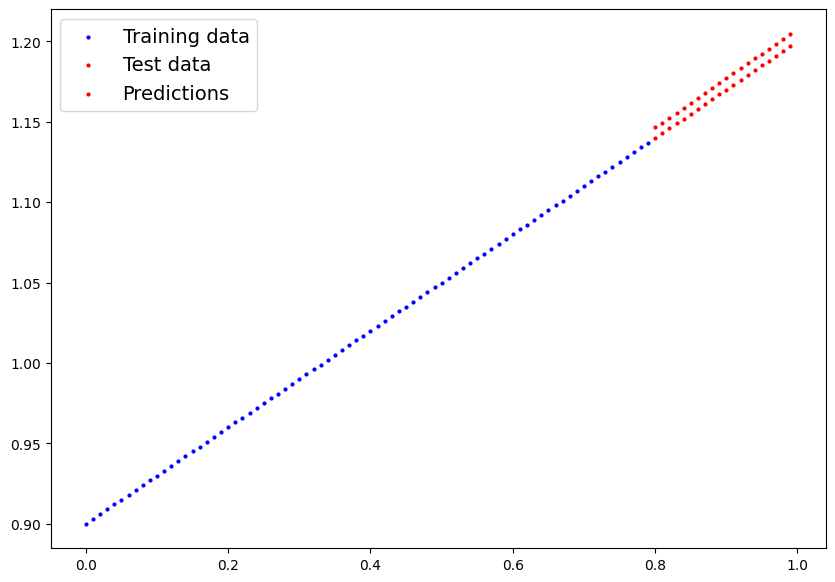

In [16]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions = y_preds.cpu())

### 5. Save your trained model's state_dict() to file.

In [17]:
from pathlib import Path
import os

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_lr_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = lr_model.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_lr_model


In [18]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

<ipython-input-18-0e241c47d006>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


LinearRegressionModel()

In [19]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [20]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3067], device='cuda:0')),
             ('bias', tensor([0.9011], device='cuda:0'))])